在这之前先读取10X数据

In [2]:
library(Seurat)
library(dplyr)
library(patchwork)
# library(readr)
library(ggplot2)
#有云服务器的，可开启并运算，这里我用4个线程：
library(future)
library(qs)
# check the current active plan
plan()
# change the current plan to access parallelization
plan("multisession", workers =40)
plan()

#设置可用的内存
# options(future.globals.maxSize = 4 * 1024^3)
plan("sequential")
future::plan()

Attaching SeuratObject

‘SeuratObject’ was built with package ‘Matrix’ 1.7.3 but the current
version is 1.7.4; it is recomended that you reinstall ‘SeuratObject’ as
the ABI for ‘Matrix’ may have changed

Seurat v4 was just loaded with SeuratObject v5; disabling v5 assays and
validation routines, and ensuring assays work in strict v3/v4
compatibility mode


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


qs 0.27.3. Announcement: https://github.com/qsbase/qs/issues/103



sequential:
- args: function (..., envir = parent.frame(), workers = "<NULL>")
- tweaked: FALSE
- call: plan(sequential)
FutureBackend to be launched

multisession:
- args: function (..., workers = 40)
- tweaked: TRUE
- call: plan("multisession", workers = 40)
MultisessionFutureBackend:
Inherits: ClusterFutureBackend, MultiprocessFutureBackend, FutureBackend
UUID: bd4c9c0babf5f117762756a4e4b14184
Number of workers: 40
Number of free workers: 40
Available cores: 80
Automatic garbage collection: FALSE
Early signaling: FALSE
Interrupts are enabled: TRUE
Maximum total size of globals: +Inf
Maximum total size of value: +Inf
Argument ‘rscript_libs’: "/home/guoliming/micromamba/envs/R4.4.3/lib/R/library"
Argument ‘persistent’: FALSE
Argument ‘wait.timeout’: 86400
Argument ‘wait.interval’: 0.01
Argument ‘wait.alpha’: 1.01
Argument ‘hooks’: FALSE
Number of active futures: 0
Number of futures since start: 0 (0 created, 0 launched, 0 finished)
Total runtime of futures: 0 secs (NaN secs/finished future)
Workers of type RichSOCKcluster:
- Summary: Socket cluster with 40 nodes on host ‘localhost’ (R version 4.4.3 (2025-02-28), platform x86_64-conda-linux-gnu)
- [ OK ] Node 1/40: valid connection, alive [RichSOCKnode of a socket cluster on local host 'localhost' with pid 54737 (R version 4.4.3 (2025-02-28), x86_64-conda-linux-gnu) using socket connection #5 ('<-localhost:11667')]
- [ OK ] Node 2/40: valid connection, alive [RichSOCKnode of a socket cluster on local host 'localhost' with pid 54741 (R version 4.4.3 (2025-02-28), x86_64-conda-linux-gnu) using socket connection #6 ('<-localhost:11667')]
- [ OK ] Node 3/40: valid connection, alive [RichSOCKnode of a socket cluster on local host 'localhost' with pid 54753 (R version 4.4.3 (2025-02-28), x86_64-conda-linux-gnu) using socket connection #7 ('<-localhost:11667')]
- [ OK ] Node 4/40: valid connection, alive [RichSOCKnode of a socket cluster on local host 'localhost' with pid 54747 (R version 4.4.3 (2025-02-28), x86_64-conda-linux-gnu) using socket connection #8 ('<-localhost:11667')]
- [ OK ] Node 5/40: valid connection, alive [RichSOCKnode of a socket cluster on local host 'localhost' with pid 54749 (R version 4.4.3 (2025-02-28), x86_64-conda-linux-gnu) using socket connection #9 ('<-localhost:11667')]
- [ OK ] Node 6/40: valid connection, alive [RichSOCKnode of a socket cluster on local host 'localhost' with pid 54759 (R version 4.4.3 (2025-02-28), x86_64-conda-linux-gnu) using socket connection #10 ('<-localhost:11667')]
- [ OK ] Node 7/40: valid connection, alive [RichSOCKnode of a socket cluster on local host 'localhost' with pid 54767 (R version 4.4.3 (2025-02-28), x86_64-conda-linux-gnu) using socket connection #11 ('<-localhost:11667')]
- [ OK ] Node 8/40: valid connection, alive [RichSOCKnode of a socket cluster on local host 'localhost' with pid 54766 (R version 4.4.3 (2025-02-28), x86_64-conda-linux-gnu) using socket connection #12 ('<-localhost:11667')]
- [ OK ] Node 9/40: valid connection, alive [RichSOCKnode of a socket cluster on local host 'localhost' with pid 54733 (R version 4.4.3 (2025-02-28), x86_64-conda-linux-gnu) using socket connection #13 ('<-localhost:11667')]
- [ OK ] Node 10/40: valid connection, alive [RichSOCKnode of a socket cluster on local host 'localhost' with pid 54756 (R version 4.4.3 (2025-02-28), x86_64-conda-linux-gnu) using socket connection #14 ('<-localhost:11667')]
- [ OK ] Node 11/40: valid connection, alive [RichSOCKnode of a socket cluster on local host 'localhost' with pid 54746 (R version 4.4.3 (2025-02-28), x86_64-conda-linux-gnu) using socket connection #15 ('<-localhost:11667')]
- [ OK ] Node 12/40: valid connection, alive [RichSOCKnode of a socket cluster on local host 'localhost' with pid 54762 (R version 4.4.3 (2025-02-28), x86_64-conda-linux-gnu) using socket connection #16 ('<-localhost:11667')]
- [ OK ] Node 13/40: valid connection, alive [RichSOCKnode of a socket cluster on local host 'localhost' with pid 54758 (R version 4.4.3 (2025-02-28), x86_64-conda-linux-gnu) using socket connection #17 ('<-localhost:11667')]
- [ OK ] Node 14/40: valid connection, alive [RichSOCKnode of a

sequential:
- args: function (..., envir = parent.frame(), workers = "<NULL>")
- tweaked: FALSE
- call: plan("sequential")
SequentialFutureBackend:
Inherits: FutureBackend
UUID: 943ded40f18618cb18e563ce3c896ba2
Number of workers: 1
Number of free workers: 1
Available cores: 80
Automatic garbage collection: FALSE
Early signaling: FALSE
Interrupts are enabled: TRUE
Maximum total size of globals: +Inf
Maximum total size of value: +Inf
Argument ‘hooks’: FALSE
Number of active futures: 0
Number of futures since start: 0 (0 created, 0 launched, 0 finished)
Total runtime of futures: 0 secs (NaN secs/finished future)

### 质量控制并确定变异基因

In [2]:
# qread速度很快
library(qs)
system.time({
    seurat.data = qread(file = "../Outdata/Step1.RawCount_merged_seurat.qs")
           })

   user  system elapsed 
  6.022   2.791   9.246 

In [3]:
## 只选择一部分数据
seurat.data = subset(seurat.data, group %in% c("ALI"))

In [4]:
#使用PercentageFeatureSet函数计算线粒体基因的百分比
seurat.data[["percent.mt"]] <- PercentageFeatureSet(object = seurat.data, pattern = "^mt-")
pdf(file="04.featureViolin.pdf",width=10,height=6)           #保存基因特征小提琴图
VlnPlot(object = seurat.data, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3,group.by = "group")
dev.off()
seurat.data <- subset(x = seurat.data, subset = nFeature_RNA > 50 & percent.mt < 5)    #对数据进行过滤


Warning message:
“The `slot` argument of `GetAssayData()` is deprecated as of SeuratObject 5.0.0.
ℹ Please use the `layer` argument instead.
ℹ The deprecated feature was likely used in the Seurat package.
  Please report the issue at <https://github.com/satijalab/seurat/issues>.”
Warning message:
“The `slot` argument of `FetchData()` is deprecated as of SeuratObject 5.0.0.
ℹ Please use the `layer` argument instead.
ℹ The deprecated feature was likely used in the Seurat package.
  Please report the issue at <https://github.com/satijalab/seurat/issues>.”
Warning message:
“`PackageCheck()` was deprecated in SeuratObject 5.0.0.
ℹ Please use `rlang::check_installed()` instead.
ℹ The deprecated feature was likely used in the Seurat package.
  Please report the issue at <https://github.com/satijalab/seurat/issues>.”


pdf 
  2

In [5]:
# #测序深度的相关性绘图
# pdf(file="04.featureCor.pdf",width=10,height=6)              #保存基因特征相关性图
# plot1 <- FeatureScatter(object = seurat.data, feature1 = "nCount_RNA", feature2 = "percent.mt",pt.size=1.5,group.by = "group")
# plot2 <- FeatureScatter(object = seurat.data, feature1 = "nCount_RNA", feature2 = "nFeature_RNA",,pt.size=1.5,group.by = "group")
# CombinePlots(plots = list(plot1, plot2))
# dev.off()


In [6]:
#对数据进行标准化
seurat.data <- NormalizeData(object = seurat.data, normalization.method = "LogNormalize", scale.factor = 10000)
#提取那些在细胞间变异系数较大的基因
seurat.data <- FindVariableFeatures(object = seurat.data, selection.method = "vst", nfeatures = 2000)



Warning message:
“The `slot` argument of `SetAssayData()` is deprecated as of SeuratObject 5.0.0.
ℹ Please use the `layer` argument instead.
ℹ The deprecated feature was likely used in the Seurat package.
  Please report the issue at <https://github.com/satijalab/seurat/issues>.”


In [7]:
#输出特征方差图
top10 <- head(x = VariableFeatures(object = seurat.data), 10)
pdf(file="04.featureVar.pdf",width=10,height=6)              #保存基因特征方差图
plot1 <- VariableFeaturePlot(object = seurat.data)
plot2 <- LabelPoints(plot = plot1, points = top10, repel = TRUE)
CombinePlots(plots = list(plot1, plot2))
dev.off()

Warning message:
“The `selection.method` argument of `HVFInfo()` is deprecated as of SeuratObject
5.0.0.
ℹ Please use the `method` argument instead.
ℹ The deprecated feature was likely used in the Seurat package.
  Please report the issue at <https://github.com/satijalab/seurat/issues>.”
When using repel, set xnudge and ynudge to 0 for optimal results

Warning message in CombinePlots(plots = list(plot1, plot2)):
“CombinePlots is being deprecated. Plots should now be combined using the patchwork system.”
Warning message in scale_x_log10():
“log-10 transformation introduced infinite values.”
Warning message in scale_x_log10():
“log-10 transformation introduced infinite values.”


pdf 
  2

In [8]:
pcSelect=20

##PCA分析
seurat.data=ScaleData(seurat.data)                     #PCA降维之前的标准预处理步骤
seurat.data=RunPCA(object= seurat.data,npcs = pcSelect,pc.genes=VariableFeatures(object = seurat.data))     #PCA分析


Centering and scaling data matrix

PC_ 1 
Positive:  Sparc, Nfib, Serpinh1, Igfbp7, Serping1, Bgn, Col6a1, Col1a2, Col3a1, Bicc1 
	   Col6a2, Mgp, Fmo2, Eln, Timp3, Col5a2, Fstl1, Col4a1, C1s1, Arhgef12 
	   Rarres2, Aebp1, Pcolce, Loxl1, Fbn1, C1ra, Ptgis, Tmem176b, Ltbp4, Sparcl1 
Negative:  Lyz2, Wfdc17, S100a8, Ccl6, Hp, S100a9, Ifitm6, Ly6c2, Arhgap15, Asprv1 
	   Retnlg, Mmp8, Stfa2l1, Satb1, Cxcl2, Nkg7, Ifitm1, Cd177, AA467197, Gm5483 
	   Slc7a11, Rgs1, Ccl5, Ly6g, Gzma, Dock10, Stat4, Fbxl5, Skap1, Il1rn 
PC_ 2 
Positive:  Calcrl, Cyyr1, Ptprm, Cdh5, Nckap5, Ldb2, Cldn5, Prickle2, Flt1, Adgrl4 
	   Tspan7, Ptprg, Egfl7, Galnt18, Adgrf5, Piezo2, Arl15, Itga1, Tmtc2, Myzap 
	   Adgrl2, Fendrr, Tmem100, Ptprb, Rasal2, Clec1a, Pcdh17, Clic5, Ramp2, Podxl 
Negative:  Dcn, Rarres2, Gpc3, C4b, Efemp1, C1s1, Igfbp6, Aebp1, Rnase4, Serping1 
	   Igfbp5, Gas1, Pcolce, Msln, Col6a1, Ptgis, C1ra, Upk3b, Selm, Nkain4 
	   Gpm6a, Upk1b, Lrrn4, C2, Bicc1, Aldh1a2, C3, Col6a2, Sbsn, Col3a1 


In [9]:
seurat.data = seurat.data %>% 
    RunUMAP(reduction = "pca", dims = 1:pcSelect, verbose = F)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”


### 去批次

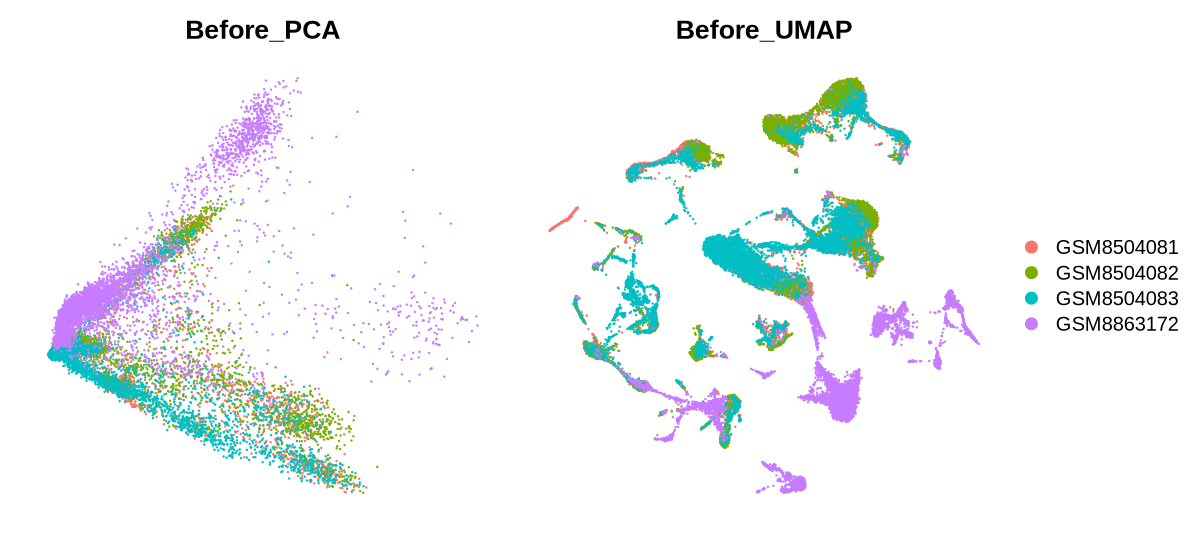

In [10]:
### 3.2 检查批次
options(repr.plot.width = 10, repr.plot.height = 4.5)
p1.compare=wrap_plots(ncol = 2,
                      DimPlot(seurat.data, reduction = "pca", group.by = "sampleID")+NoAxes()+ggtitle("Before_PCA"),
                      DimPlot(seurat.data, reduction = "umap", group.by = "sampleID")+NoAxes()+ggtitle("Before_UMAP"),
                      guides = "collect"
)
p1.compare

Loading required package: Rcpp

Transposing data matrix

Initializing state using k-means centroids initialization



Harmony 1/10

Harmony 2/10

Harmony 3/10

Harmony 4/10

Harmony 5/10

Harmony 6/10

Harmony 7/10

Harmony 8/10

Harmony 9/10

Harmony 10/10

Harmony converged after 10 iterations



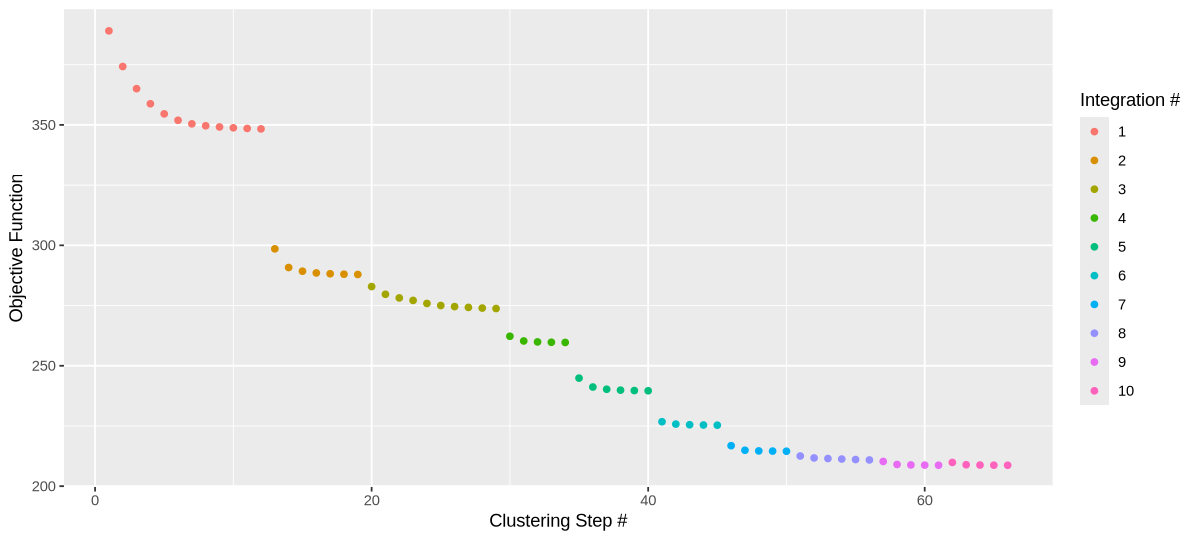

In [11]:
### 4.1 RunHarmony 小样本运行比较快
library(harmony)
seurat.data <- seurat.data %>% RunHarmony("sampleID", plot_convergence = T)

In [12]:
### 去批次之后，还需要再RunUMAP一次更新harmony
seurat.data <- seurat.data %>% 
  RunUMAP(reduction = "harmony", dims = 1:pcSelect, verbose = F)

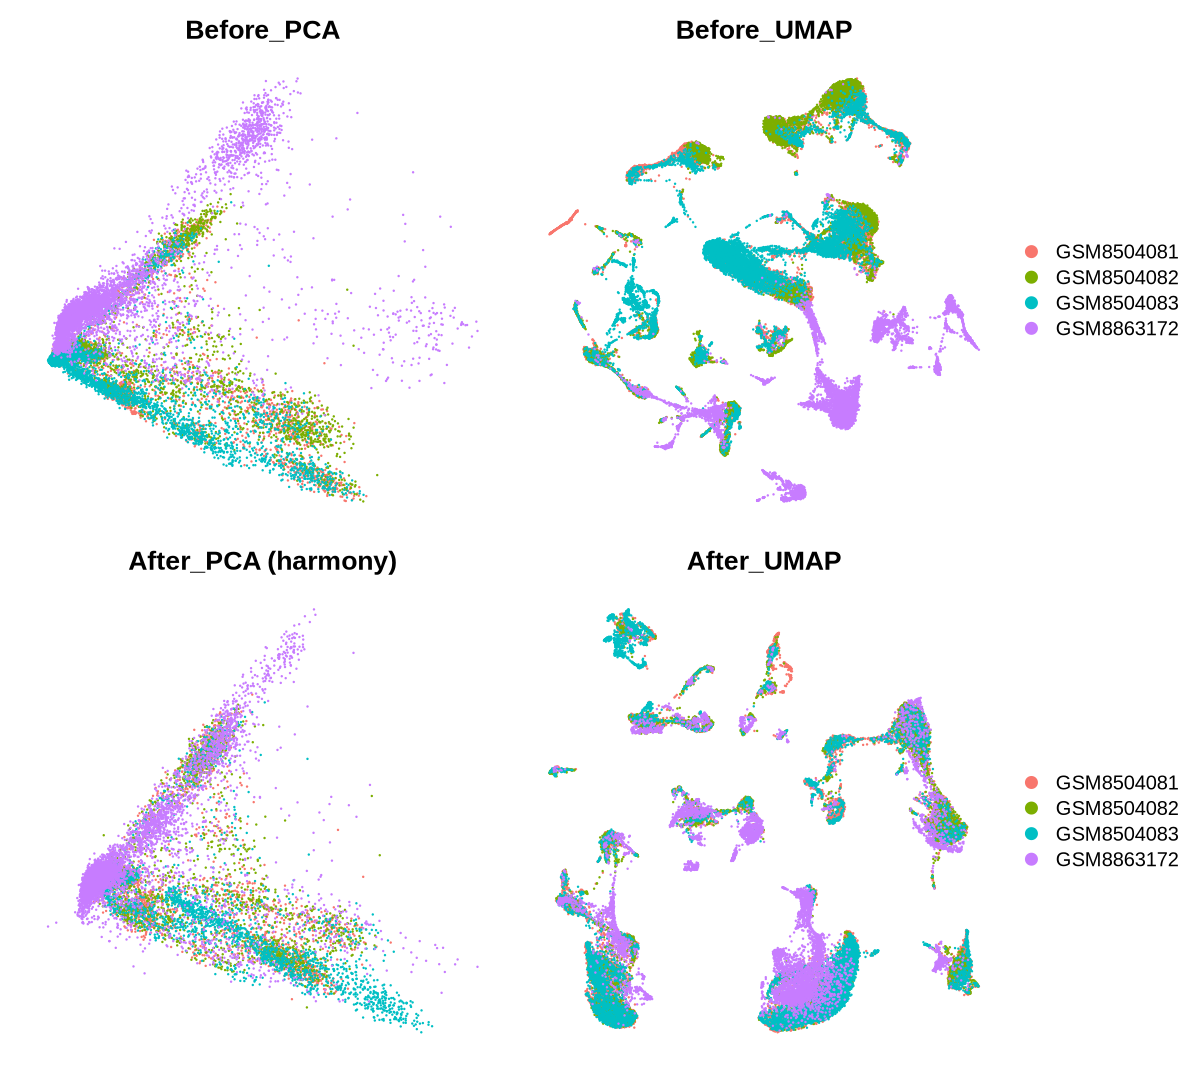

In [13]:
p2.compare=wrap_plots(ncol = 2,
                      DimPlot(seurat.data, reduction = "harmony", group.by = "sampleID")+NoAxes()+ggtitle("After_PCA (harmony)"),
                      DimPlot(seurat.data, reduction = "umap", group.by = "sampleID")+NoAxes()+ggtitle("After_UMAP"),
                      guides = "collect"
)
# p2.compare

options(repr.plot.width = 10, repr.plot.height = 9)
wrap_plots(p1.compare, p2.compare, ncol = 1)


In [14]:
pdf(file="after_hamrmony.pdf",width=10,height=9)
wrap_plots(p1.compare, p2.compare, ncol = 1)
dev.off()

pdf 
  2

### 找合适的resolution

In [16]:
# 对比多种resolution的聚类结果
seurat.data <- FindNeighbors(seurat.data, reduction = "harmony", dims = 1:pcSelect)
for (res in c(0.05,0.1,0.2,0.3,0.5,0.8,1,1.2,1.4,1.5,2)){
  print(res)
  seurat.data <- FindClusters(seurat.data,resolution = res, algorithm = 1)
}

Computing nearest neighbor graph



Computing SNN



[1] 0.05
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 34569
Number of edges: 1256482

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9909
Number of communities: 11
Elapsed time: 4 seconds
[1] 0.1
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 34569
Number of edges: 1256482

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9851
Number of communities: 16
Elapsed time: 6 seconds
[1] 0.2
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 34569
Number of edges: 1256482

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9747
Number of communities: 21
Elapsed time: 5 seconds
[1] 0.3
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 34569
Number of edges: 1256482

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9660
Number of communities: 25

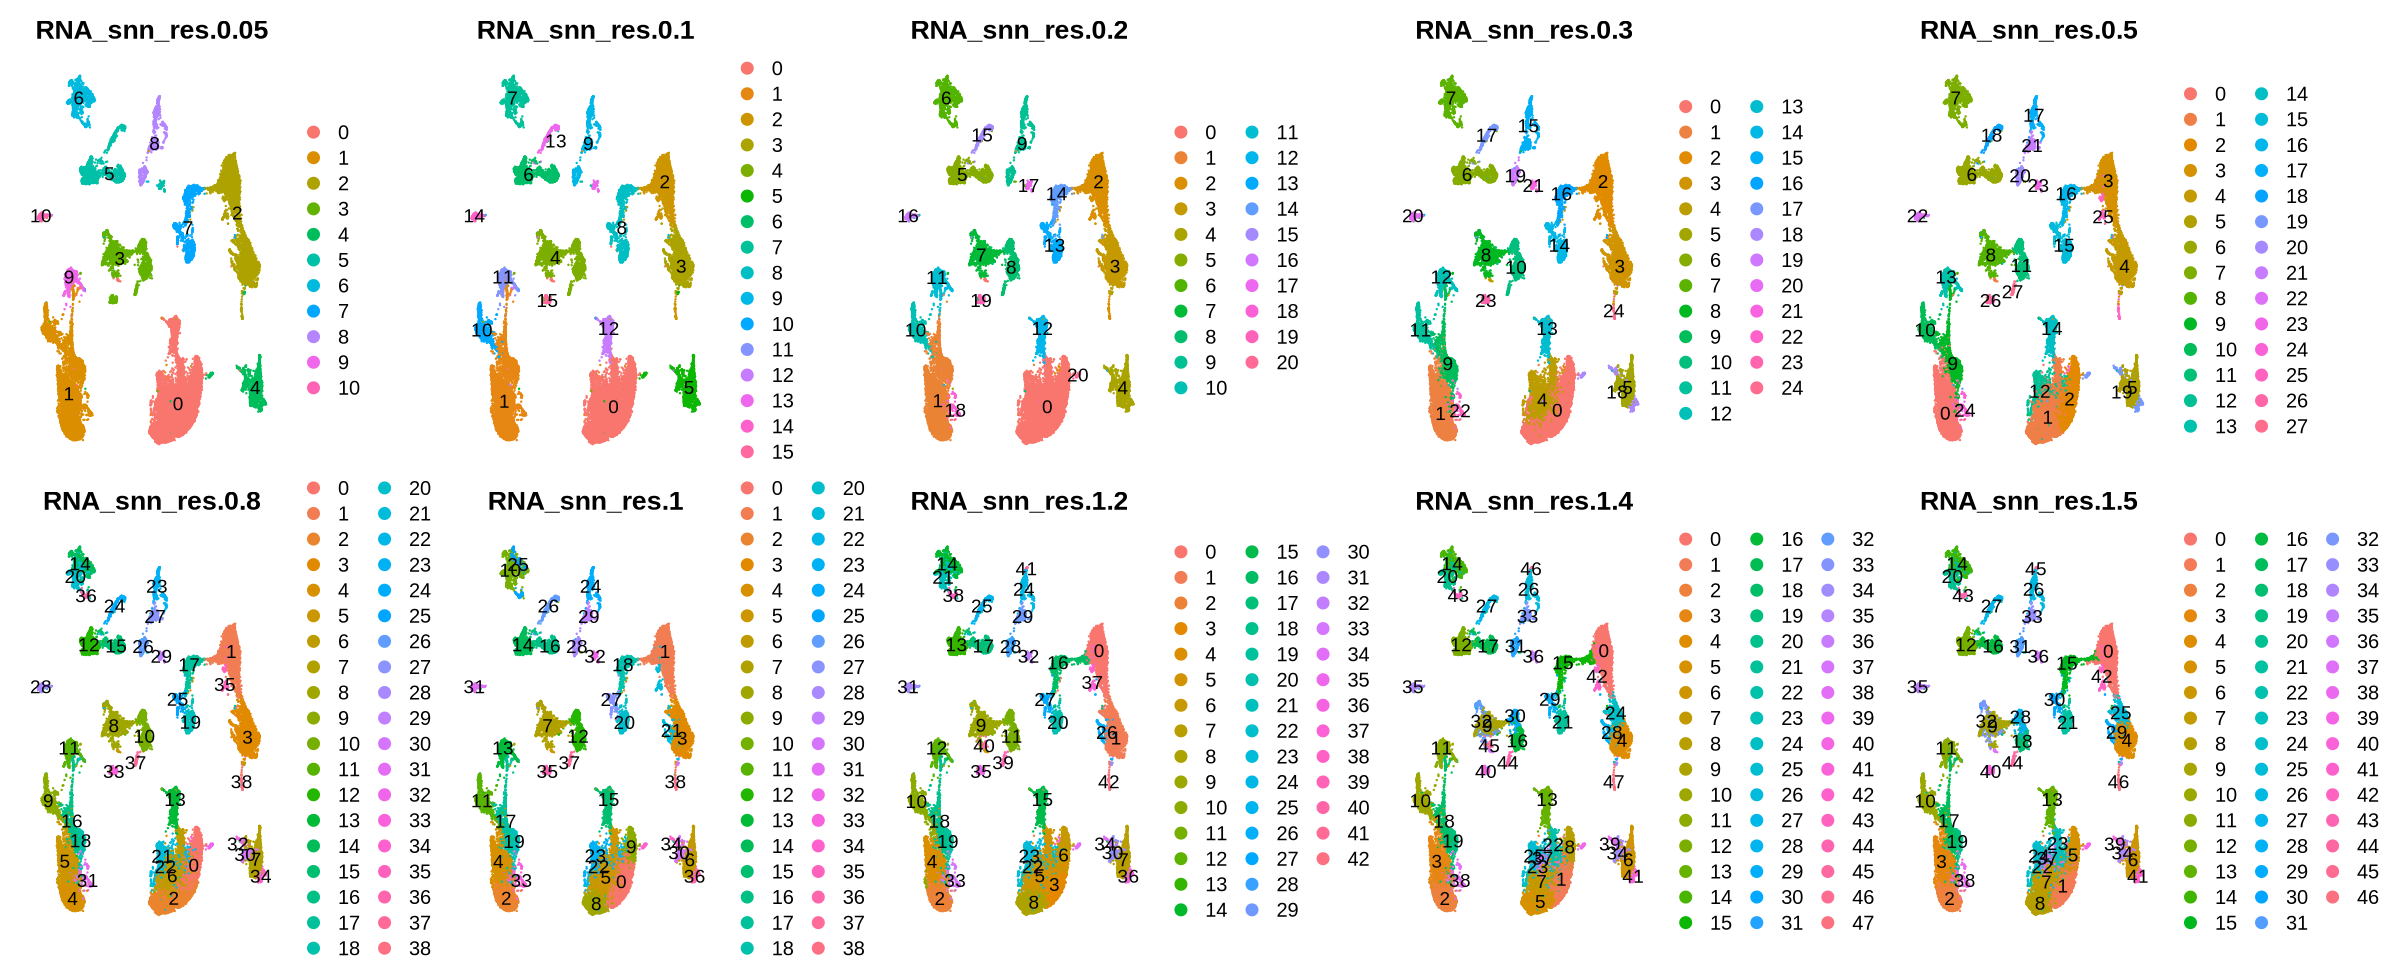

In [17]:
options(repr.plot.width = 20, repr.plot.height = 8)
#umap可视化
cluster_umap <- wrap_plots(ncol = 5,
                           DimPlot(seurat.data, reduction = "umap", group.by = "RNA_snn_res.0.05", label = T) & NoAxes(),  
                           DimPlot(seurat.data, reduction = "umap", group.by = "RNA_snn_res.0.1", label = T) & NoAxes(),
                           DimPlot(seurat.data, reduction = "umap", group.by = "RNA_snn_res.0.2", label = T) & NoAxes(),
                           DimPlot(seurat.data, reduction = "umap", group.by = "RNA_snn_res.0.3", label = T)& NoAxes(),
                           DimPlot(seurat.data, reduction = "umap", group.by = "RNA_snn_res.0.5", label = T) & NoAxes(),
                           DimPlot(seurat.data, reduction = "umap", group.by = "RNA_snn_res.0.8", label = T) & NoAxes(), 
                           DimPlot(seurat.data, reduction = "umap", group.by = "RNA_snn_res.1", label = T) & NoAxes(),
                           DimPlot(seurat.data, reduction = "umap", group.by = "RNA_snn_res.1.2", label = T) & NoAxes(),
                           DimPlot(seurat.data, reduction = "umap", group.by = "RNA_snn_res.1.4", label = T)& NoAxes(),
                           DimPlot(seurat.data, reduction = "umap", group.by = "RNA_snn_res.1.5", label = T)& NoAxes()
)
cluster_umap

In [18]:
Idents(seurat.data) <- seurat.data@meta.data$RNA_snn_res.1

In [19]:
pdf(file="07.Umap_1.pdf",width=6.5,height=6)
# 默认用seurat_clusters列（最后一次聚类得到的列）
DimPlot(seurat.data, reduction = "umap", label = TRUE) & NoAxes()
dev.off()

pdf 
  2

In [20]:
#qs速度快
#install.packages('qs')
library(qs)
system.time({
    qsave(seurat.data,file = "./Outdata/Cluster_no_annotion.qs") 
})

   user  system elapsed 
 13.093   1.284  16.535 

### 主要细胞类型注释

In [11]:
# 读取未注释的数据
seurat.data = qread(file = "./Outdata/Cluster_no_annotion.qs")

In [11]:
# # 将 RNA 表达矩阵的基因名称转换为大写
# rownames(seurat.data@assays$RNA@counts) = toupper(rownames(seurat.data@assays$RNA@counts))
# rownames(seurat.data@assays$RNA@data) = toupper(rownames(seurat.data@assays$RNA@data))

Warning message:
“The following requested variables were not found: Clec4c, Fcgr3b”


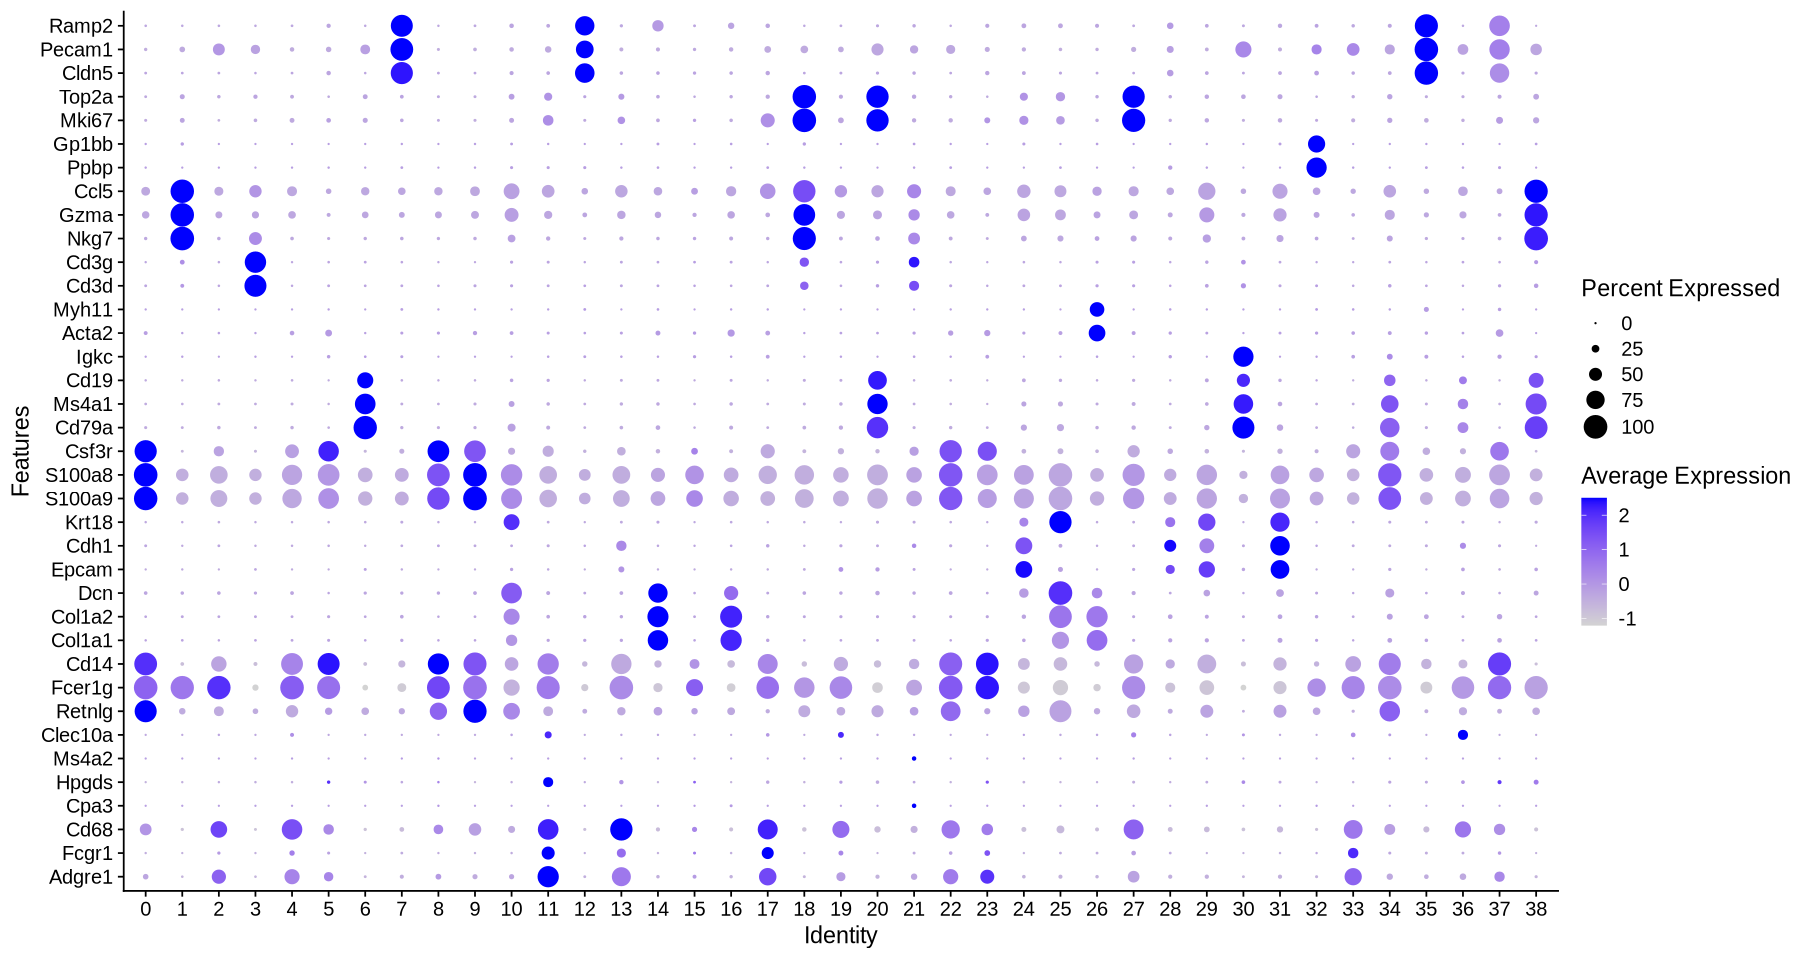

In [12]:
### 基因名称区分大小写，需要有assay中的基因名称大小写一直

# 默认seurat_clusters列为RNA_snn_res.0.2
Idents(seurat.data) <- seurat.data@meta.data$RNA_snn_res.1

options(repr.plot.width = 15, repr.plot.height = 8)

# # 文章PMID:39822976，GSE276682数据集！！！
# check_genes = c(
#   "S100a9","Retnlg","Fcer1g",   # 髓系细胞 (Myeloid_cells)
#   "Cd79a","Ms4a1","Cd19",   # B细胞 (B_cells)
#   "Cd3d","Cd3g",   # T细胞 (T_cells)
#   "Nkg7","Gzma","Ccl5",   # NK细胞 (NK_cells)
#   "Col1a1","Col1a2","Dcn",   # 成纤维细胞 (Fibroblasts)
#   "Cldn5","Pecam1","Ramp2",   # 内皮细胞 (Endothelial cells)
#   "Epcam","Cdh1","Krt18"   # 上皮细胞 (Epithelial cells)
# )

# #梦琪脓毒症Marker！！！

# check_genes = c("Adgre1","Fcgr1","Cd68", # 巨噬细胞
#                 "Pecam1","Vwf",'Emcn',# 内皮细胞
#                 "Tnni3", "Mb", "Myl3", # 心肌细胞
#                 "S100a9", "S100a8", "Mki67" #中性粒细胞
#                 "Cd79a", "Igkc", #B细胞
#                 "Acta2", "Myh11", #平滑肌细胞
#                 "Cd3g","Gzma","Ccl5", #NK/T细胞
#                 "Rgs5","Kcnj8", #周细胞
#                 "Kcna2","Ank3","Chl1", #神经元
#                 'Col1a1','Col1a2' #成纤维细胞
# )


# 合并以上两者
check_genes = c(
                "Adgre1","Fcgr1","Cd68", # 巨噬细胞
                "Cpa3","Hpgds","Ms4a2", # 肥大细胞
                "Clec10a","Clec4c", #DC cells
                "Retnlg","Fcer1g","Cd14",   # 髓系细胞 (Myeloid_cells)  需要进一步细分巨噬细胞、中性粒细胞
                "Col1a1","Col1a2","Dcn",# 成纤维细胞 Fibroblast
                "Epcam","Cdh1","Krt18",   # 上皮细胞 (Epithelial cells)
                # "Tnni3", "Mb", "Myl3", # 心肌细胞
                "S100a9", "S100a8",'Csf3r',"Fcgr3b", #"Mki67", #中性粒细胞
                "Cd79a", "Ms4a1","Cd19","Igkc", #B细胞
                "Acta2", "Myh11", #平滑肌细胞 Smooth muscle cells
                "Cd3d","Cd3g", #T细胞
                "Nkg7","Gzma","Ccl5",   # NK细胞 (NK_cells)
                # "Rgs5","Kcnj8", #周细胞
                # "Kcna2","Ank3","Chl1", #神经元
                "Ppbp","Gp1bb", # Platelets
                'Mki67','Top2a', #Cell cycling
                
                "Cldn5","Pecam1","Ramp2"   # 内皮细胞 (Endothelial cells)
)


DotPlot(object = seurat.data, features = check_genes, 
        assay = "RNA",scale = T) + coord_flip()

In [13]:
check_genes = c(
                "Adgre1","Fcgr1","Cd68", # 巨噬细胞
                # "Cpa3","Hpgds","Ms4a2", # 肥大细胞
                # "Clec10a","Clec4c", #DC cells
                "Retnlg","Fcer1g","Cd14",   # 髓系细胞 (Myeloid_cells)  需要进一步细分巨噬细胞、中性粒细胞
                "Col1a1","Col1a2","Dcn",# 成纤维细胞 Fibroblast
                "Epcam","Cdh1","Krt18",   # 上皮细胞 (Epithelial cells)
                # "Tnni3", "Mb", "Myl3", # 心肌细胞
                "S100a9", "S100a8",'Csf3r', #"Mki67", #中性粒细胞 Neutrophils
                "Cd79a", "Ms4a1","Cd19","Igkc", #B细胞
                "Acta2", "Myh11", #平滑肌细胞 Smooth muscle cells
                "Cd3d","Cd3g", #T细胞
                "Nkg7","Gzma","Ccl5",   # NK细胞 (NK_cells)
                # "Rgs5","Kcnj8", #周细胞
                # "Kcna2","Ank3","Chl1", #神经元
                "Ppbp","Gp1bb", # Platelets
                'Mki67','Top2a', #Cell cycling
                
                "Cldn5","Pecam1","Ramp2"   # 内皮细胞 (Endothelial cells)
)

###分配细胞名称
celltype=data.frame(ClusterID=0:38,celltype='NA')

## Neutrophils
celltype[celltype$ClusterID %in% c(0,5,8,9,15,22,23),2]='Neutrophils' #CRL

## Macrophage
celltype[celltype$ClusterID %in% c(2,4,11,13,17,19,33),2]='Macrophage' #CRL

# Myeloid_cells
celltype[celltype$ClusterID %in% c(27),2]='Other Myeloid cells' #CRL

## Fibroblast
celltype[celltype$ClusterID %in% c(10,14,16,25),2]='Fibroblast' #CRL

## Epithelial_cells
celltype[celltype$ClusterID %in% c(24,28,29,31),2]='Epithelial cells' #CRL

## B_cells
celltype[celltype$ClusterID %in% c(6,20,30,34,36),2]='B cells' # 

## Smooth muscle cells
celltype[celltype$ClusterID %in% c(26),2]='Smooth muscle cells' #CRL


## T_cells
celltype[celltype$ClusterID %in% c(3,21),2]='T cells'  #CRL

## NK_cells
celltype[celltype$ClusterID %in% c(1,18,38),2]='NK cells'  #CRL

## Endothelial_cells
celltype[celltype$ClusterID %in% c(7,12,35,37),2]='Endothelial cells' #CRL

# Platelets
celltype[celltype$ClusterID %in% c(32),2]='Platelets' #CRL




colnames(celltype) = c("ClusterID","celltype_main")
seurat.data@meta.data$celltype = "NA"
for(i in 1:nrow(celltype)){
  seurat.data@meta.data[which(seurat.data@active.ident == celltype$ClusterID[i]),'celltype'] <- celltype$celltype[i]}
table(seurat.data@meta.data$celltype)


            B cells   Endothelial cells    Epithelial cells          Fibroblast 
               2820                2617                1288                2987 
         Macrophage         Neutrophils            NK cells Other Myeloid cells 
               7834                9541                3641                 338 
          Platelets Smooth muscle cells             T cells 
                224                 384                2895 

### 其他细胞类型注释

In [6]:
# options(repr.plot.width = 15, repr.plot.height = 8)
# ## 红细胞和增殖细胞
# check_genes = c("Hbb","Hba1","Hba2", # 红细胞,Erythroid cells
#                 "Ppbp","Gp1bb", # Platelets
#                 'Mki67','Top2a' #Cell cycling
# )
# DotPlot(object = seurat.data, features = check_genes, 
#         assay = "RNA",scale = T) + coord_flip()


# options(repr.plot.width = 15, repr.plot.height = 8)
# check_genes = c("Rgs1","Ptprc",'Tyrobp', #Leukocytes (Leu) 
#                 'Cd3d','Cd3e',"Cd3g","Cd2",'Trac','Il32', #T cells
#                 'Sell',"Ccr7","Lef1","Tcf7",'Il7r', #Naive
#                  "Gzma", "Gzmb","Ifng","Prf1","Gnly", #Effect/cytotoxic
#                 'Cd4','Cd40lg','Cd8a','Cd8b','Il2ra','Foxp3',
#                 "Nkg7","Klrd1","Ifit1", #NK cells
#                 "Ighm","Cd22","Cd79a","Cd19","Ms4a1","Sdc1", #B cells
#                 "Jchain","Mzb1","Prdm1","Igj" #Plasma cells
# )
# DotPlot(object = seurat.data, features = check_genes,assay = "RNA",scale = T) + 
#     coord_flip()


# options(repr.plot.width = 15, repr.plot.height = 8)
# check_genes = c("Rgs1","Ptprc",'Tyrobp', #Leukocytes (Leu) 
#                 'Cd3d','Cd3e',"Nkg7",
#                 'Cd68',"Hla-dqb1","Hla-drb1", #MNP,mononuclear phagocytes
#                 "Apoe","C1qa",'C1qb',#Macrophages
#                 "Itgax","Cd14","Fcgr3a","S100a8","Mmp19",#Monocyte 
#                 "Clec10a","Clec4c", #DC cells
#                 "Irf8","Clec9a", "Flt3",#C10_cCD1_CLEC9A IDO1+
#                 "Cd1e","Cd1c","Fcgr1a","Sirpa", "Mafb", #C6_cCD2_CD1C
#                 "Ccr7","Lamp3","Fscn1", "Ido1","Ido2", #DC3 #C11_cDC3_LAMP3
#                 "Lilra4", "Slc32a1","Shd","Lrrc26","Pacsin1","Il3ra", #pDCs C9_pDC_LILRA4 GZMB+
#                 "Kit","Fcer1g","Gata2",'Tpsb2','Ms4a2','Tpsab1','Eng','Enpp3', #Mast cells
#                 "Csf3r","S100a9","Fcgr3b","Alpl","Cxcr1",#Neutrophils
#                 "Olr1","Ldha","Il1rn","Cd44", #PMN-MDSC
#                 "Cxcr2","Adgrg3","Cmtm2","Prok2","Mme","Mmp25",
#                 "Tnfrsf10c","Ceacam8" #Neutrophils
# )
# DotPlot(object = seurat.data, features = check_genes,assay = "RNA",scale = T) + 
#     coord_flip()


# options(repr.plot.width = 15, repr.plot.height = 8)
# check_genes = c("Ackr1",'Cldn5',"Pecam1","Igfbp7",'Sele','Hmox1','Rgs1','Cd200','Vwf','Eng','Cdh5', #Endothelia
#                   "Mt1a","Myh11",#Myofibroblast and Smooth muscle
#                   "Tpm2",'Myl9','Egfl7','Pln', #Smooth muscle (SM)
#                   "Gem","Gja4",#Myofibroblast
#                   "Dcn","Apod","Vim","Lum",'Fbln1','Ptgds','Cfd','Sri','Tagln2','Dpt','Tnfaip6', #Fibroblas (Fib)
#                   'Acta2', #Fibroblas (Fib) & Smooth muscle (SM)
#                   "Rgs5","Notch3","Pdgfrb","Thy1","Ndufa4l2",  #pericytes
#                  "Myl1","Mylpf","Myog","Myf5","Myod1","Des","Pax7", #myoblasts
#                 'Epcam',#Epithelial
#                 "Krt4", "Krt13"
#   )	
# DotPlot(object = seurat.data, features = check_genes,assay = "RNA",scale = T) + 
#     coord_flip()


In [14]:
pdf(file="09.Umap_annotion_1.pdf",width=12,height=10)
DimPlot(seurat.data, reduction = "umap", group.by = "celltype", label = T)& NoAxes()
dev.off()

pdf 
  2

In [15]:
head(seurat.data@meta.data)
Idents(seurat.data) <- seurat.data@meta.data$celltype
table(seurat.data@meta.data$celltype)

,orig.ident,nCount_RNA,nFeature_RNA,sampleID,group,percent.mt,RNA_snn_res.0.05,seurat_clusters,RNA_snn_res.0.1,RNA_snn_res.0.2,RNA_snn_res.0.3,RNA_snn_res.0.5,RNA_snn_res.0.8,RNA_snn_res.1,RNA_snn_res.1.2,RNA_snn_res.1.4,RNA_snn_res.1.5,RNA_snn_res.2,celltype
,<chr>,<dbl>,<int>,<chr>,<chr>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<chr>
GSM8504081_AAACCCAAGGCATCAG-1,GSM8504081,5907,1602,GSM8504081,ALI,3.741324,2,19,3,3,3,4,3,3,1,24,25,19,T cells
GSM8504081_AAACCCACAATTGCTG-1,GSM8504081,20565,4283,GSM8504081,ALI,4.459032,8,30,9,9,15,17,23,24,24,26,26,30,Epithelial cells
GSM8504081_AAACCCACAGGCAATG-1,GSM8504081,19694,4135,GSM8504081,ALI,4.691784,1,11,10,10,11,10,9,11,10,10,10,11,Macrophage
GSM8504081_AAACCCAGTCGAATTC-1,GSM8504081,7257,2038,GSM8504081,ALI,4.533554,4,7,5,4,5,5,7,6,7,6,6,7,B cells
GSM8504081_AAACCCATCAATGCAC-1,GSM8504081,3922,1628,GSM8504081,ALI,2.855686,1,0,1,1,1,0,4,2,2,2,2,0,Macrophage
GSM8504081_AAACCCATCCGTGGCA-1,GSM8504081,12166,3079,GSM8504081,ALI,4.257768,4,46,5,4,18,19,34,36,36,41,41,46,B cells



            B cells   Endothelial cells    Epithelial cells          Fibroblast 
               2820                2617                1288                2987 
         Macrophage         Neutrophils            NK cells Other Myeloid cells 
               7834                9541                3641                 338 
          Platelets Smooth muscle cells             T cells 
                224                 384                2895 

In [16]:
## 2.5 保存数据
qsave(seurat.data, file = "./Outdata/Step3.Cluster_annotion.qs")

### 按照指定细胞类型顺序绘制Marker基因图

In [67]:
seurat.data=qread(file = "./Outdata/Step3.Cluster_annotion.qs")

In [17]:
table(seurat.data@meta.data$celltype)


            B cells   Endothelial cells    Epithelial cells          Fibroblast 
               2820                2617                1288                2987 
         Macrophage         Neutrophils            NK cells Other Myeloid cells 
               7834                9541                3641                 338 
          Platelets Smooth muscle cells             T cells 
                224                 384                2895 

In [18]:
# 按照 check_genes 从下到上的顺序，确定细胞类型顺序
check_genes = c(
                "Adgre1","Fcgr1","Cd68", # 巨噬细胞
                # "Cpa3","Hpgds","Ms4a2", # 肥大细胞
                # "Clec10a","Clec4c", #DC cells
                "Retnlg","Fcer1g","Cd14",   # 髓系细胞 (Myeloid_cells)  需要进一步细分巨噬细胞、中性粒细胞
                "Col1a1","Col1a2","Dcn",# 成纤维细胞 Fibroblast
                "Epcam","Cdh1","Krt18",   # 上皮细胞 (Epithelial cells)
                # "Tnni3", "Mb", "Myl3", # 心肌细胞
                "S100a9", "S100a8",'Csf3r', #"Mki67", #中性粒细胞 Neutrophils
                "Cd79a", "Ms4a1","Cd19","Igkc", #B细胞
                "Acta2", "Myh11", #平滑肌细胞 Smooth muscle cells
                "Cd3d","Cd3g", #T细胞
                "Nkg7","Gzma","Ccl5",   # NK细胞 (NK_cells)
                # "Rgs5","Kcnj8", #周细胞
                # "Kcna2","Ank3","Chl1", #神经元
                "Ppbp","Gp1bb", # Platelets
                # 'Mki67','Top2a', #Cell cycling
                
                "Cldn5","Pecam1","Ramp2"   # 内皮细胞 (Endothelial cells)
)

# 按照指定顺序定义因子水平
celltype_order <- c(
  "Endothelial cells",
  "Platelets",
  "NK cells",
  "T cells",
  "Smooth muscle cells",
  "B cells",
  "Neutrophils",
  "Epithelial cells",
  "Fibroblast",
  "Macrophage",
  "Other Myeloid cells"

)

# 确保 celltype 列为因子
seurat.data$celltype <- factor(seurat.data$celltype, levels = celltype_order)

# DotPlot
p <- DotPlot(
    seurat.data, 
    features = check_genes, 
    assay = "RNA", 
    scale = TRUE,
    group.by = "celltype"
) + 
  coord_flip() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

# 保存
pdf(file="06.markerBubble.reordered.pdf", width=10, height=10)
print(p)
dev.off()


pdf 
  2

In [ ]:


# # 绘制marker的小提琴图
# pdf(file="06.markerViolin.pdf",width=10,height=6)
# VlnPlot(object = seurat.data, features = c("Gzma","Ccl5"))
# dev.off()


# #绘制marker在各个cluster的散点图
# pdf(file="06.markerScatter.pdf",width=10,height=6)
# FeaturePlot(object = seurat.data, features = c("Gzma","Ccl5"),cols = c("green", "red"))
# dev.off()

# #绘制marker在各个cluster的气泡图
# pdf(file="06.markerBubble.pdf",width=12,height=6)
# cluster10Marker=c("Gzma","Ccl5")
# DotPlot(object = seurat.data, features = cluster10Marker)
# dev.off()


pdf 
  2

pdf 
  2

### 计算每个cluster的marker基因

各种reduction都是为了可视化，FindMarkers只用Xount数据不是细胞注释必须的！！！！

## 这里先不进行差异基因分析（只对疾病组）

In [ ]:
# qread速度很快
library(qs)
system.time({
    seurat.data = qread(file = "./Outdata/Step3.Cluster_annotion.qs")
           })

   user  system elapsed 
  8.645   3.022  11.676 

In [27]:
head(seurat.data@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,sampleID,group,percent.mt,RNA_snn_res.0.05,seurat_clusters,RNA_snn_res.0.1,RNA_snn_res.0.2,RNA_snn_res.0.3,RNA_snn_res.0.5,RNA_snn_res.0.8,RNA_snn_res.1,RNA_snn_res.1.2,RNA_snn_res.1.4,RNA_snn_res.1.5,RNA_snn_res.2,celltype
,<chr>,<dbl>,<int>,<chr>,<chr>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
GSM8504081_AAACCCAAGGCATCAG-1,GSM8504081,5907,1602,GSM8504081,ALI,3.741324,2,27,4,4,5,5,4,4,4,26,27,27,NK/T cells
GSM8504081_AAACCCACAATTGCTG-1,GSM8504081,20565,4283,GSM8504081,ALI,4.459032,11,41,15,18,23,24,33,35,36,39,40,41,Epithelial cells
GSM8504081_AAACCCACAGGCAATG-1,GSM8504081,19694,4135,GSM8504081,ALI,4.691784,0,11,10,7,11,10,11,9,9,10,10,11,Myeloid cells
GSM8504081_AAACCCAGTCGAATTC-1,GSM8504081,7257,2038,GSM8504081,ALI,4.533554,5,7,5,5,7,6,8,7,7,6,7,7,B cells
GSM8504081_AAACCCATCAATGCAC-1,GSM8504081,3922,1628,GSM8504081,ALI,2.855686,0,0,1,1,0,0,3,2,2,0,0,0,Myeloid cells
GSM8504081_AAACCCATCCGTGGCA-1,GSM8504081,12166,3079,GSM8504081,ALI,4.257768,0,13,1,7,14,14,13,14,13,15,13,13,Myeloid cells


In [28]:
Idents(seurat.data) <- seurat.data@meta.data$celltype

In [7]:
##寻找差异表达的特征
log2FCfilter=1 # 表示2的1次方，即相差两倍
adjPvalFilter=0.05

In [30]:

seurat.data.markers <- FindAllMarkers(object = seurat.data,
                               only.pos = FALSE,
                               min.pct = 0.25,
                               logfc.threshold = log2FCfilter)


Calculating cluster Endothelial cells



Calculating cluster NK/T cells

Calculating cluster Smooth muscle cells

Calculating cluster B cells

Calculating cluster Epithelial cells

Calculating cluster Fibroblast

Calculating cluster Myeloid cells

Calculating cluster Unknown



In [31]:
top10 <- seurat.data.markers %>% group_by(cluster) %>% top_n(n = 10, wt = avg_log2FC)


In [ ]:
# # 对这些基因单独进行缩放
# seurat.data <- ScaleData(seurat.data, features = unique(top10$gene))


Centering and scaling data matrix



In [32]:
table(seurat.data@meta.data$celltype)


  Endothelial cells          NK/T cells Smooth muscle cells             B cells 
               2989                6527                 366                2274 
   Epithelial cells          Fibroblast       Myeloid cells             Unknown 
                925                3101               18279                 108 

In [33]:
head(seurat.data@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,sampleID,group,percent.mt,RNA_snn_res.0.05,seurat_clusters,RNA_snn_res.0.1,RNA_snn_res.0.2,RNA_snn_res.0.3,RNA_snn_res.0.5,RNA_snn_res.0.8,RNA_snn_res.1,RNA_snn_res.1.2,RNA_snn_res.1.4,RNA_snn_res.1.5,RNA_snn_res.2,celltype
,<chr>,<dbl>,<int>,<chr>,<chr>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
GSM8504081_AAACCCAAGGCATCAG-1,GSM8504081,5907,1602,GSM8504081,ALI,3.741324,2,27,4,4,5,5,4,4,4,26,27,27,NK/T cells
GSM8504081_AAACCCACAATTGCTG-1,GSM8504081,20565,4283,GSM8504081,ALI,4.459032,11,41,15,18,23,24,33,35,36,39,40,41,Epithelial cells
GSM8504081_AAACCCACAGGCAATG-1,GSM8504081,19694,4135,GSM8504081,ALI,4.691784,0,11,10,7,11,10,11,9,9,10,10,11,Myeloid cells
GSM8504081_AAACCCAGTCGAATTC-1,GSM8504081,7257,2038,GSM8504081,ALI,4.533554,5,7,5,5,7,6,8,7,7,6,7,7,B cells
GSM8504081_AAACCCATCAATGCAC-1,GSM8504081,3922,1628,GSM8504081,ALI,2.855686,0,0,1,1,0,0,3,2,2,0,0,0,Myeloid cells
GSM8504081_AAACCCATCCGTGGCA-1,GSM8504081,12166,3079,GSM8504081,ALI,4.257768,0,13,1,7,14,14,13,14,13,15,13,13,Myeloid cells


### 不绘制差异基因热图，因为细胞数量太多了，细分的时候绘制

In [ ]:
#绘制差异基因在   指定   细胞类型的热图（图片有问题）

# top10.sub <- subset(top10, cluster %in% c(
#     "Myeloid cells",
#     "Endothelial cells", "Epithelial cells", 
#     "Unknown"))

# seurat.sub <- subset(seurat.data_ALI, idents = c(
#     "Myeloid cells", 
#     "Endothelial cells","Epithelial cells",
#     "Unknown"))
# pdf(file="06.seurat.sub.pdf",width=10,height=15)
# DoHeatmap(seurat.sub, features = top10.sub$gene)
# dev.off()

pdf 
  2

In [ ]:
# #绘制差异基因在各个细胞类型的热图（图片有问题）
# pdf(file="06.tsneHeatmap.pdf",width=20,height=8)
# DoHeatmap(seurat.data, features = top10$gene, group.by = "celltype") + NoLegend()
# dev.off()

In [34]:
save(seurat.data.markers,
     file = "Step6.celltype.markers.0.3.Rdata")

In [2]:
# 重新加载数据
load("Step6.celltype.markers.0.3.Rdata")

In [3]:
##寻找差异表达的特征
log2FCfilter=1 # 表示2的1次方，即相差两倍
adjPvalFilter=0.05

head(seurat.data.markers)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
Calcrl,0,4.447151,0.855,0.123,0,Endothelial cells,Calcrl
Cldn5,0,4.219244,0.775,0.042,0,Endothelial cells,Cldn5
Epas1,0,4.003598,0.883,0.128,0,Endothelial cells,Epas1
Ramp2,0,3.763808,0.767,0.053,0,Endothelial cells,Ramp2
Adgrf5,0,3.715424,0.831,0.062,0,Endothelial cells,Adgrf5
Cdh5,0,3.708449,0.753,0.033,0,Endothelial cells,Cdh5


In [4]:
sig.markers=seurat.data.markers[(abs(as.numeric(as.vector(seurat.data.markers$avg_log2FC)))>log2FCfilter & as.numeric(as.vector(seurat.data.markers$p_val_adj))<adjPvalFilter),]
# write.table(sig.markers,file="06.markers.xls",sep="\t",row.names=F,quote=F)


In [5]:
head(sig.markers)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
Calcrl,0,4.447151,0.855,0.123,0,Endothelial cells,Calcrl
Cldn5,0,4.219244,0.775,0.042,0,Endothelial cells,Cldn5
Epas1,0,4.003598,0.883,0.128,0,Endothelial cells,Epas1
Ramp2,0,3.763808,0.767,0.053,0,Endothelial cells,Ramp2
Adgrf5,0,3.715424,0.831,0.062,0,Endothelial cells,Adgrf5
Cdh5,0,3.708449,0.753,0.033,0,Endothelial cells,Cdh5


In [ ]:
# 将 RNA 表达矩阵的基因名称转换为大写
# rownames(sig.markers) = toupper(rownames(sig.markers))

### 富集分析

基因SYMBOL转GENE ID(富集的前提)

In [6]:
library("org.Mm.eg.db")          #引用包小鼠
# rt=read.table("symbol.txt",sep="\t",check.names=F,header=T)    #读取文件
genes=as.vector(sig.markers[,7])
entrezIDs <- mget(genes, org.Mm.egSYMBOL2EG, ifnotfound=NA)    #找出基因对应的id
entrezIDs <- as.character(entrezIDs)
sig.markers_entrezIDs=cbind(sig.markers,entrezID=entrezIDs)
write.table(sig.markers_entrezIDs,file="./shengxinzixue/id.txt",sep="\t",quote=F,row.names=F)    #输出结果

Loading required package: AnnotationDbi

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following object is masked from ‘package:SeuratObject’:

    intersect


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, saveRDS, setdiff,
    table, tapply, union, unique, unsplit, which.max, which.min


Loading required package: Biobase

Welcome to Bioconductor

    Vignettes contain introductory material; view with
    'browseVi


Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:dplyr’:

    first, rename


The following object is masked from ‘package:utils’:

    findMatches


The following objects are masked from ‘package:base’:

    expand.grid, I, unname



Attaching package: ‘IRanges’


The following objects are masked from ‘package:dplyr’:

    collapse, desc, slice



Attaching package: ‘AnnotationDbi’


The following object is masked from ‘package:dplyr’:

    select






In [7]:
table(sig.markers_entrezIDs$cluster)


  Endothelial cells          NK/T cells Smooth muscle cells             B cells 
                582                 369                 460                 345 
   Epithelial cells          Fibroblast       Myeloid cells             Unknown 
                370                 370                 308                 844 

### 生信自学GO富集（Unknown类）

In [8]:
### 选择cluster为0的亚群进行富集分析
library("clusterProfiler")




clusterProfiler v4.14.6 Learn more at https://yulab-smu.top/contribution-knowledge-mining/

Please cite:

T Wu, E Hu, S Xu, M Chen, P Guo, Z Dai, T Feng, L Zhou, W Tang, L Zhan,
X Fu, S Liu, X Bo, and G Yu. clusterProfiler 4.0: A universal
enrichment tool for interpreting omics data. The Innovation. 2021,
2(3):100141


Attaching package: ‘clusterProfiler’


The following object is masked from ‘package:AnnotationDbi’:

    select


The following object is masked from ‘package:IRanges’:

    slice


The following object is masked from ‘package:S4Vectors’:

    rename


The following object is masked from ‘package:stats’:

    filter




In [9]:
sig.markers_entrezIDs <- subset(sig.markers_entrezIDs, cluster == 'Unknown') 
 
sig.markers_entrezIDs=sig.markers_entrezIDs[is.na(sig.markers_entrezIDs[,"entrezID"])==F,]                                 #去除基因id为NA的基因
gene=sig.markers_entrezIDs$entrezID

#GO富集分析
kk <- enrichGO(gene = gene,
               OrgDb = org.Mm.eg.db, 
               pvalueCutoff =0.05, 
               qvalueCutoff = 0.05,
               ont="all",
               readable =T)
write.table(kk,file="./shengxinzixue/GO.txt",sep="\t",quote=F,row.names = F)                 #保存富集结果

In [13]:
#柱状图
pdf(file="GO_barplot.pdf",width = 10,height = 15)
# options(repr.plot.width = 10, repr.plot.height = 15)
barplot(kk, drop = TRUE, showCategory = 10, split="ONTOLOGY") +
  facet_grid(ONTOLOGY ~ ., scale = "free") +
  theme(
    axis.text.x = element_text(color = "black", size = 16),  # x轴文字
    axis.text.y = element_text(color = "black", size = 16),    # y轴文字
    strip.text.y = element_text(color = "black", size = 20),  # 分面标签
    axis.title = element_text(color = "black", size = 20) # 坐标轴标题
  )+
    theme(
    legend.text = element_text(size = 16),   # 图例文字大小
    legend.title = element_text(size = 16),  # 图例标题大小
    legend.key.size = unit(1, "cm")          # 图例方块大小
  )

dev.off()



pdf 
  2

In [15]:
pdf(file="GO_bubble.pdf", width = 10, height = 15)

dotplot(kk, showCategory = 10, split = "ONTOLOGY") +
  facet_grid(ONTOLOGY ~ ., scale = "free") +
  theme(
    axis.text.x = element_text(color = "black", size = 16),   # x轴文字
    axis.text.y = element_text(color = "black", size = 16),   # y轴文字
    strip.text.y = element_text(color = "black", size = 20),  # 分面标签
    axis.title  = element_text(color = "black", size = 20),   # 坐标轴标题
    legend.text = element_text(size = 16),                    # 图例文字
    legend.title= element_text(size = 16),                    # 图例标题
    legend.key.size = unit(1, "cm")                           # 图例方块大小
  )

dev.off()


pdf 
  2

生信自学KEGG

In [16]:
#kegg富集分析
kk <- enrichKEGG(gene = gene,
                 organism = "mmu",
                 pvalueCutoff = 0.05,
                 qvalueCutoff = 0.05)

write.table(kk,file="./shengxinzixue/KEGGId.txt",sep="\t",quote=F,row.names = F)                          #保存富集结果

Reading KEGG annotation online: "https://rest.kegg.jp/link/mmu/pathway"...

Reading KEGG annotation online: "https://rest.kegg.jp/list/pathway/mmu"...



In [17]:
#柱状图
pdf(file="KEGG_barplot.pdf",width = 10,height = 15)
# options(repr.plot.width = 10, repr.plot.height = 15)
barplot(kk, drop = TRUE, showCategory = 30) +
  theme(
    axis.text.x = element_text(color = "black", size = 16),  # x轴文字
    axis.text.y = element_text(color = "black", size = 16),    # y轴文字
    strip.text.y = element_text(color = "black", size = 20),  # 分面标签
    axis.title = element_text(color = "black", size = 20) # 坐标轴标题
  )+
    theme(
    legend.text = element_text(size = 16),   # 图例文字大小
    legend.title = element_text(size = 16),  # 图例标题大小
    legend.key.size = unit(1, "cm")          # 图例方块大小
  )

dev.off()



pdf 
  2

In [18]:
pdf(file="KEGG_bubble.pdf", width = 10, height = 15)

dotplot(kk, showCategory = 30) +
  theme(
    axis.text.x = element_text(color = "black", size = 16),   # x轴文字
    axis.text.y = element_text(color = "black", size = 16),   # y轴文字
    strip.text.y = element_text(color = "black", size = 20),  # 分面标签
    axis.title  = element_text(color = "black", size = 20),   # 坐标轴标题
    legend.text = element_text(size = 16),                    # 图例文字
    legend.title= element_text(size = 16),                    # 图例标题
    legend.key.size = unit(1, "cm")                           # 图例方块大小
  )

dev.off()


pdf 
  2